# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).



Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.



__Задание__. Необходимо выполнить два задания



1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов



2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов



Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.



Ваш код обязательно должен проходить все `assert`'ы ниже.



__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.





__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.





__Советы и указания__:

 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)

 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)

 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.

 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)

 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.

 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету

 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.

 - Фиксируйте random seed.

 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.

 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.

 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.



Good luck & have fun! :)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb

!pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**



В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:



1. Получить к ней доступ с помощью VPN.



2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:



```shell

git submodule update --init --recursive

make docs

```

После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).



3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉



4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [3]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки

import wandb



wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
import math

import os

import random

import sys



import matplotlib.pyplot as plt

import numpy as np

import pytorch_lightning as pl

import torch

import torchvision

import torchvision.transforms as transforms

from PIL import Image

from pytorch_lightning.loggers import WandbLogger

from torch import nn

from torch.nn import functional as F

from torch.utils.data import DataLoader

from torchmetrics.functional import accuracy

from torchvision.datasets import ImageFolder

from tqdm import tqdm



# You may add any imports you need

In [5]:
def seed_everything(seed):

    # Фискирует максимум сидов.

    # Это понадобится, чтобы сравнение оптимизаторов было корректным

    random.seed(seed)

    os.environ["PYTHONHASHSEED"] = str(seed)

    np.random.seed(seed)

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.deterministic = True





seed_everything(123456)

In [7]:
import torchmetrics

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.

2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)



```

  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)



  trainer.tune(module, train_dataloader, eval_dataloader)



  trainer.fit(module, train_dataloader, eval_dataloader))

```







3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)

4. Подбор архитектуры модели.

5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:



  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`

  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)

6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)

7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.

 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)

 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])



val_transform = transforms.Compose([
    transforms.ToTensor()
])



train_dataset = ImageFolder('/kaggle/input/iad-hw2/train/train', transform=train_transform)

val_dataset = ImageFolder('/kaggle/input/iad-hw2/val/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [9]:
# Just very simple sanity checks

assert isinstance(train_dataset[0], tuple)

assert len(train_dataset[0]) == 2

assert isinstance(train_dataset[1][1], int)

print("tests passed")

tests passed


### Посмотрим на картиночки

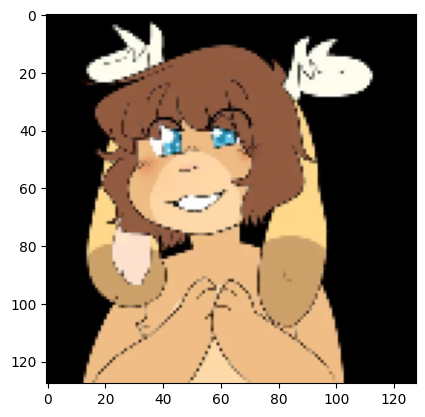

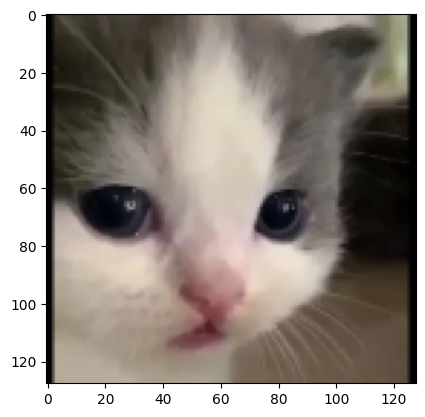

In [73]:
for batch in val_dataloader:

    images, class_nums = batch

    plt.imshow(images[5].permute(1, 2, 0))

    plt.show()

    plt.imshow(images[19].permute(1, 2, 0))

    plt.show()

    break

## Задание 1.



5 баллов

Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.





Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)

4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [21]:
import torchvision.models as models

class YourNet(nn.Module):
    def __init__(self):
        super(YourNet, self).__init__()
        
        self.feature_extractor = models.efficientnet_b0(pretrained=False)
        features_out = self.feature_extractor.classifier[1].in_features

        self.feature_extractor.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(features_out, 100)
        )

        self.outputs = None
        self.labels = None

    def _forward(self, x):
        # Основной forward-проход
        return self.feature_extractor(x)

    def forward(self, images, target=None):
        predictions = self._forward(images)
        if target is not None:
            loss = F.cross_entropy(predictions, target)
            self.outputs = torch.argmax(predictions, dim=1)
            self.labels = target
            return loss
        else:
            return predictions

    def get_accuracy(self, reset=False):
        total_correct = (self.outputs == self.labels).sum().item()
        total_samples = self.labels.size(0)
        accuracy = total_correct / total_samples
        
        if reset:
            self.outputs = None
            self.labels = None
        return accuracy

### Тренировочный класс lightning

In [75]:
class YourModule(pl.LightningModule):
    def __init__(self, model, lr):
        super(YourModule, self).__init__()
        self.network = model
        self.learning_rate = lr

    def forward(self, x):
        return self.network._forward(x)

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        lr_scheduler = torch.optim.lr_scheduler.StepLR(
            optimizer, step_size=10, gamma=0.5
        )
        return {'optimizer': optimizer, 'lr_scheduler': lr_scheduler}

    def training_step(self, batch, batch_idx):
        imgs, lbls = batch
        train_loss = self.network(imgs, lbls)
        train_acc = self.network.get_accuracy(reset=True)
        
        self.log("train_loss", train_loss, prog_bar=True)
        self.log("train_acc", train_acc, prog_bar=True)
        return train_loss

    def validation_step(self, batch, batch_idx):
        imgs, lbls = batch
        val_loss = self.network(imgs, lbls)
        val_acc = self.network.get_accuracy(reset=True)
        
        self.log("val_loss", val_loss, prog_bar=True)
        self.log("val_acc", val_acc, prog_bar=True)
        return val_loss

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [79]:
model = YourNet().to(device)
module = YourModule(model, lr=0.0008)

wandb_logger = WandbLogger(log_model='all')

trainer = pl.Trainer(
    logger=wandb_logger,
    devices="auto",
    max_epochs=30,
    accelerator='gpu' if torch.cuda.is_available() else "cpu"
)

trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
torch.save(model.state_dict(), 'iad1.pth')

### Валидация результатов задания

In [30]:
def evaluate_task(model, test_dataloader, device="cuda:0"):

    model = model.to(device)

    model.eval()

    accuracy = 0.0

    for images, labels in tqdm(test_dataloader):

        images, labels = images.to(device), labels.to(device)

        with torch.no_grad():

            loss = model(images, labels)

            acc_batch = model.get_accuracy(reset=True)

        accuracy += acc_batch

    accuracy = accuracy / len(test_dataloader)

    return accuracy

In [82]:
model = YourNet()

model.load_state_dict(torch.load('iad1.pth', map_location=device))

model.to(device)



accuracy = evaluate_task(model, val_dataloader)
print(accuracy)
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.24, 0, 5):.2f} баллов")

/tmp/ipykernel_30/666494331.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('nopretren.pth', map_location=device))

100%|██████████| 40/

0.21875
Оценка за это задание составит 4.56 баллов


## Задание 2



5 баллов

Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.



Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).

4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.

5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [47]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        base_model = models.efficientnet_b0(pretrained=True)
        
        num_features = base_model.classifier[1].in_features
        base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(num_features, 100),
        )
        
        self.model = base_model
        self._preds = None
        self._targets = None

    def _forward(self, x):
        return self.model(x)

    def forward(self, images, target=None):
        predictions = self._forward(images)
        
        if target is not None:
            loss_value = F.cross_entropy(predictions, target)
            self._preds = predictions.argmax(dim=1)
            self._targets = target
            return loss_value
        return predictions

    def get_accuracy(self, reset=False):
        correct_predictions = (self._preds == self._targets).sum().item()
        total_samples = self._targets.size(0)
        accuracy = correct_predictions / total_samples
        
        # Сброс значений, если нужно
        if reset:
            self._preds, self._targets = None, None
        return accuracy

### Тренировочный класс lightning

In [48]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate=0.001):
        super().__init__()
        self._network = model
        self._lr = learning_rate

    def forward(self, x):
        # Выполнение forward для модели
        return self._network._forward(x)

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self._lr)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, labels = train_batch
        loss_value = self._network(images, labels)
        accuracy = self._network.get_accuracy(reset=True)
        
        self.log('train_loss', loss_value, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', accuracy, on_step=True, on_epoch=True, prog_bar=True)
        
        return loss_value

    def validation_step(self, val_batch, batch_idx):
        images, labels = val_batch
        loss_value = self._network(images, labels)
        accuracy = self._network.get_accuracy(reset=True)
        
        self.log('val_loss', loss_value, on_step=True, on_epoch=True, prog_bar=True)
        self.log('val_acc', accuracy, on_step=True, on_epoch=True, prog_bar=True)
        
        return loss_value

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
wandb.finish()

epoch,▁▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇█
train_acc_epoch,▁▂▂▃▃▄▄▄▅▅▆▇▇██
train_acc_step,▁▁▂▃▃▂▂▂▂▄▄▃▅▅▃▃▄▄▅▃▄▄▄▃▄▅▆▄▆▇▆▇▇▅▆▇▇▆▇█
train_loss_epoch,█▇▆▆▆▅▅▅▄▄▃▂▂▁▁
train_loss_step,█▇▆▅▅▅▆▅▄▅▅▅▄▄▄▄▅▅▅▄▄▄▄▄▄▄▄▄▃▃▂▂▃▁▂▁▂▂▁▁
trainer/global_step,▁▂▂▁▁▁▁▁▁▁▁▄▁▁▅▁▁▁▁▅▆▁▁▁▁▁▁▁▇▁▁▁▁▁█▁▁█▁▁
val_acc_epoch,▁▃▄▅▆▆▆▆▆██▇▇▇▇
val_acc_step,▂▂▂▃▃▂▁▄▃▂▄▃█▅▄▂▃▄▄▃▃▂▂▃▁▄▄▃▂▄▂▃▄▃▆▂▂▃▃▂
val_loss_epoch,▅▃▂▁▁▁▁▁▂▁▂▄▅▇█
val_loss_step,▇▃▄▅▄▅▄▄▆▂▆▃▂▃▄▃▅▅▅▁▅▇▄▇▆▅▃▄▅▆▃▄▇▄▁█▅▇▂▇
epoch,14


In [51]:
model = YourNet().to(device)
module = YourModule(model, learning_rate=0.001)

wandb_logger = WandbLogger(log_model='all')

In [27]:
trainer = pl.Trainer(
    logger=wandb_logger,
    devices="auto",
    max_epochs=15,
    accelerator='gpu' if torch.cuda.is_available() else "cpu"
)

trainer.fit(module, train_dataloader, val_dataloader)

wandb: Currently logged in as: semyon-zotov (semyon-zotov-google). Use `wandb login --relogin` to force relogin


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [28]:
torch.save(model.state_dict(), 'iad2.pth')

### Валидация результатов задания

In [42]:
model = YourNet()

model.load_state_dict(torch.load('iad2.pth', map_location=device))

model.to(device)

accuracy = evaluate_task(model, val_dataloader)
# accuracy = 0.3212
print(accuracy)

print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.24) / 0.1, 0, 5):.2f} баллов")

/tmp/ipykernel_30/59609415.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('pretren.pth', map_location=device))
100%|██████████| 40/40 [

0.3046875
Оценка за это задание составит 3.23 баллов


In [44]:
accuracy = 0.3212
print(accuracy)

print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.24) / 0.1, 0, 5):.2f} баллов")

0.3212
Оценка за это задание составит 4.06 баллов


Это вторая попытка данной модели, на первой попытке accuracy была 0.3212, на скрине видно это, сжалуйтесь, пожалуйста...... тратить 3 часа на обучение не хочется:((

**Отчет**

Я обучил две модели классификации на базе EfficientNet-B0,чтобы получить лучше цифры, чЧтобы оптимизировать параметры, использовался алгоритм AdamW, а для контроля скорости обучения — scheduler StepLR, который уменьшает learning rate каждые 10 шагов.Для улучшения обучения применялись различные аугментации: случайный поворот, изменение яркости и контраста, горизонтальное отражение. Эти трансформации добавляют вариативности в тренировочные данные и помогают модели лучше обобщать результаты на новых данных. Четко видно при сравнении двух моделей на графиках потерь и точности, что модель с предобученными весами уже "знает" общие признаки, полезные для классификации изображений, что ускоряет и стабилизирует процесс обучения. Это отражается в более высоких показателях точности и меньших потерях на графиках по сравнению с моделью, обучаемой с нуля.
https://wandb.ai/semyon-zotov-google/lightning_logs?nw=nwusersemyonzotov

Графики прикрепил в anytask